In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
acc_death = pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [4]:
acc_death.rename(columns = {'Accidental deaths in USA: monthly, 1973 ? 1978':'Deaths'}, inplace = True)

In [5]:
acc_death.head()

,Month,Deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [6]:
acc_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   72 non-null     object
 1   Deaths  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


1. Multiple Box Plot

In [7]:
import seaborn as sns

In [8]:
acc_death['Month'] = pd.to_datetime(acc_death['Month'], errors='coerce')
acc_death['month'] = acc_death['Month'].dt.strftime('%b')

acc_death['year'] = [d.year for d in acc_death.Month]

acc_death['month'] = [d.strftime('%b') for d in acc_death.Month]

years = acc_death['year'].unique()

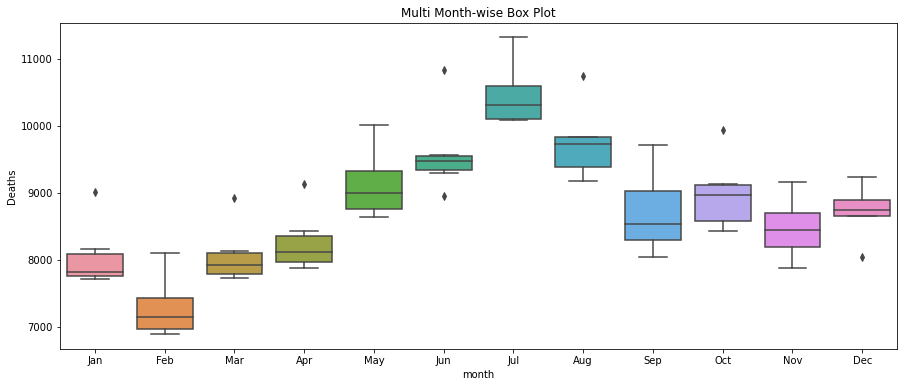

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Deaths', data=acc_death).set_title("Multi Month-wise Box Plot")
plt.show()

2. Seasonality using Auto Correlation

In [10]:
from pandas.plotting import autocorrelation_plot

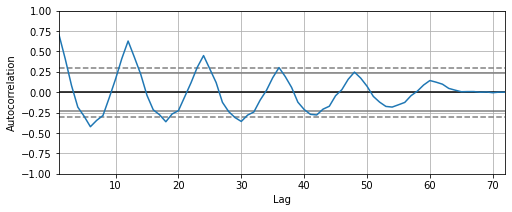

In [11]:
plt.figure(figsize=(8,3))
autocorrelation_plot(acc_death['Deaths'].tolist())
plt.show()

3. Deseasonalising Time Series

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
acc_death_result_add = seasonal_decompose(acc_death['Deaths'], model='additive', period=1)
acc_death_deseason_a = acc_death['Deaths'] - acc_death_result_add.seasonal

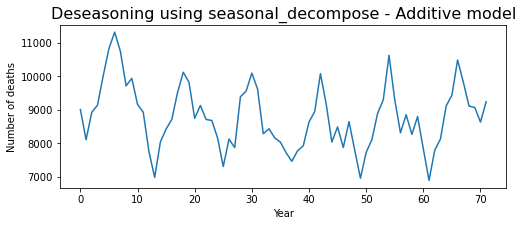

In [14]:
plt.figure(figsize=(8,3))
plt.plot(acc_death_deseason_a)
plt.title('Deseasoning using seasonal_decompose - Additive model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.show()

In [15]:
acc_death_result_mul = seasonal_decompose(acc_death['Deaths'], model='multiplicative', period=1)
acc_death_deseason_m = acc_death['Deaths'] - acc_death_result_mul.seasonal

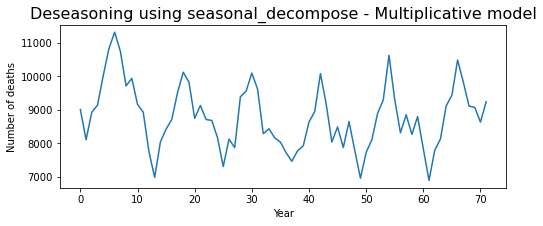

In [16]:
plt.figure(figsize=(8,3))
plt.plot(acc_death_deseason_m)
plt.title('Deseasoning using seasonal_decompose - Multiplicative model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.show()

4. Seasonal Decomposition

    a. From Scratch

In [17]:
import numpy as np

Text(0.5, 1.0, 'Trend against Time')

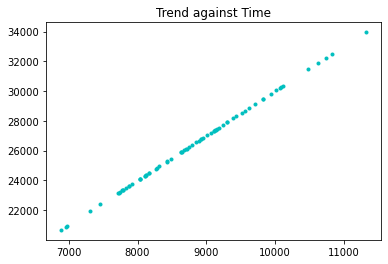

In [18]:
acc_death_T_Series = acc_death['Deaths']

acc_death_Trend = acc_death_T_Series * 3

plt.plot(acc_death_T_Series, acc_death_Trend, 'c.')
plt.title("Trend against Time")

Text(0.5, 1.0, 'Seasonality against Time')

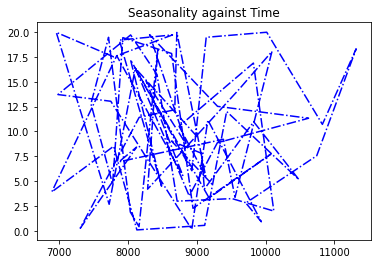

In [19]:
acc_death_seasonality = 10 + np.sin(acc_death_T_Series) * 10

plt.plot(acc_death_T_Series,  acc_death_seasonality, 'b-.')
plt.title("Seasonality against Time")

Text(0.5, 1.0, 'Residuals against Time')

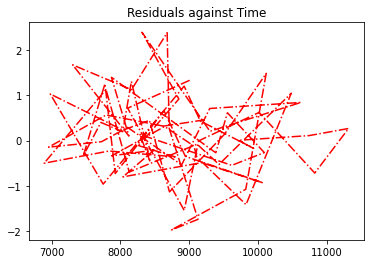

In [20]:
np.random.seed(10)
acc_death_residual = np.random.normal(loc=0.0, scale=1, size=len(acc_death_T_Series))

#plot the residual component 
plt.plot(acc_death_T_Series, acc_death_residual, 'r-.')
plt.title("Residuals against Time")

Text(0.5, 1.0, 'Additive Time Series')

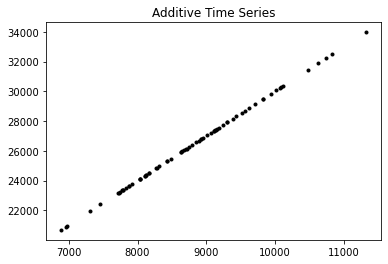

In [21]:
acc_death_additive_Tmodel = acc_death_Trend + acc_death_seasonality + acc_death_residual

#Plot the additive model
plt.plot(acc_death_T_Series, acc_death_additive_Tmodel, 'k.')
plt.title("Additive Time Series")

Text(0.5, 1.0, 'Multiplicative Time Series')

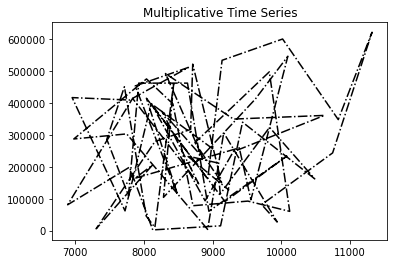

In [22]:
ignored_residual = np.ones_like(acc_death_residual)
acc_death_multiplicative_Tmodel = acc_death_Trend * acc_death_seasonality * ignored_residual

plt.plot(acc_death_T_Series, acc_death_multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")

    b. Using Libraries

<Figure size 576x216 with 0 Axes>

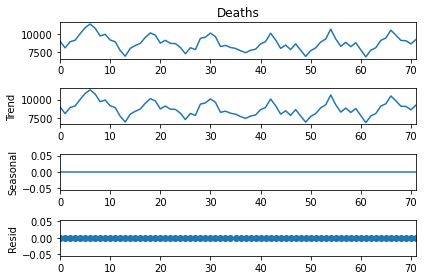

In [23]:
plt.figure(figsize=(8,3))
acc_death_result = seasonal_decompose(acc_death['Deaths'], model='additive', period=1)
acc_death_result.plot()
plt.show()

<Figure size 576x216 with 0 Axes>

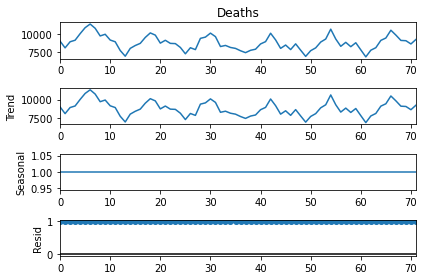

In [24]:
plt.figure(figsize=(8,3))
acc_death_result = seasonal_decompose(acc_death['Deaths'], model='multiplicative', period=1)
acc_death_result.plot()
plt.show()